In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150, 
                          n_features=2, 
                          centers=3, 
                          cluster_std=0.5, 
                          random_state=0)

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

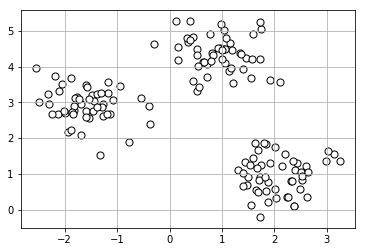

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='White', marker='o', edgecolor='black', s=50)
plt.grid()

# 分割式聚類

# K-Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3, 
                    init='random', 
                    n_init=10, 
                    max_iter=300, 
                    tol=1e-04, 
                    random_state=0)

y_km = km.fit_predict(X)

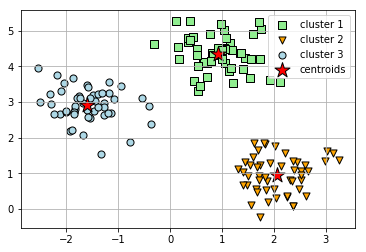

In [7]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
            s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], 
            s=50, c='orange', marker='v', edgecolors='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], 
            s=50, c='lightblue', marker='o', edgecolors='black', label='cluster 3')
#質心
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

# K-means++ 演算法

老師說初始點選K-means++比較好
#在選取初始質時，盡可能讓他們彼此遠離

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3, 
                    init='k-means++', 
                    n_init=10, 
                    max_iter=300, 
                    tol=1e-04, 
                    random_state=0)

y_km = km.fit_predict(X)

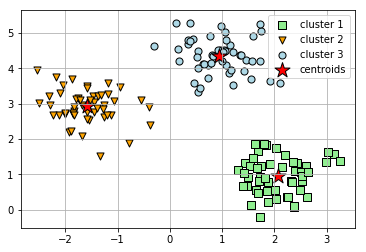

In [10]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
            s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], 
            s=50, c='orange', marker='v', edgecolors='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], 
            s=50, c='lightblue', marker='o', edgecolors='black', label='cluster 3')
#質心
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

# 轉折判斷法

群內誤差平和
聚類數目 k增加，失真就會減少
“找出失真開始迅速增加的聚類數 k”

Distortion: 72.48


Text(0,0.5,'Distortion')

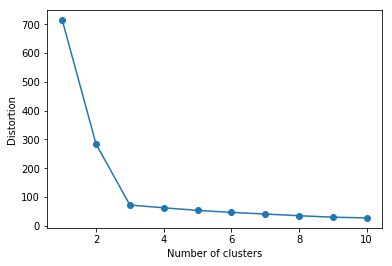

In [11]:
print('Distortion: %.2f' % km.inertia_) 

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                       init='k-means++',
                       n_init=10,
                       max_iter=300,
                       random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# 階層式聚類

# Ward’s Method

In [12]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram

可以看出最好的 k，如果要把它分為三類，距離就擴增到20

Text(0,0.5,'Cluster distance')

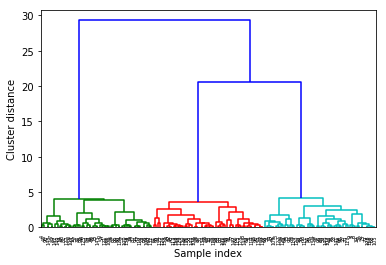

In [13]:
linkage = ward(X)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# 密度式聚類

# DBSCAN 演算法

密度大分成一群

成「半月型結構」的數據

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

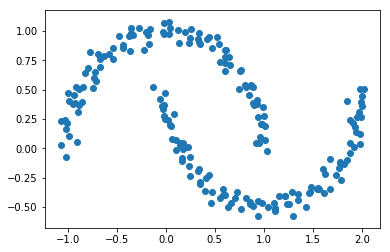

In [16]:
plt.scatter(X[:, 0], X[:, 1])

聚類法的比較 2個

In [17]:
from sklearn.cluster import AgglomerativeClustering

<function matplotlib.pyplot.legend(*args, **kwargs)>

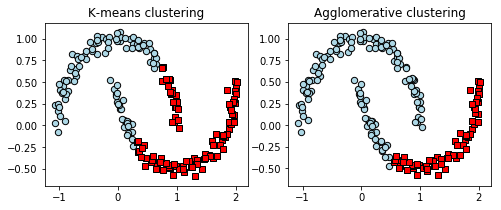

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
#KMeans
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
            s=40, c='lightblue', marker='o', edgecolors='black', label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], 
            s=40, c='red', marker='s', edgecolors='black', label='cluster 2')
ax1.set_title('K-means clustering')

#AgglomerativeClustering
ac = AgglomerativeClustering(linkage='ward', 
                                         affinity='euclidean', 
                                         n_clusters=2)
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], 
            s=40, c='lightblue', marker='o', edgecolors='black', label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], 
            s=40, c='red', marker='s', edgecolors='black', label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend

In [19]:
from sklearn.cluster import DBSCAN

<function matplotlib.pyplot.legend(*args, **kwargs)>

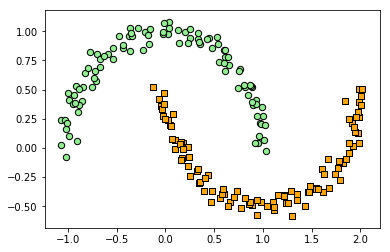

In [20]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], 
            s=40, c='lightgreen', marker='o', edgecolors='black', label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], 
            s=40, c='orange', marker='s', edgecolors='black', label='cluster 2')

plt.legend

# 聚類法的比較 3個

<function matplotlib.pyplot.legend(*args, **kwargs)>

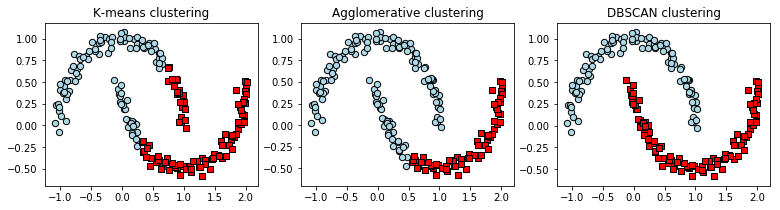

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,3))
#KMeans
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
            s=40, c='lightblue', marker='o', edgecolors='black', label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], 
            s=40, c='red', marker='s', edgecolors='black', label='cluster 2')
ax1.set_title('K-means clustering')

#AgglomerativeClustering
ac = AgglomerativeClustering(linkage='ward', 
                                         affinity='euclidean', 
                                         n_clusters=2)
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], 
            s=40, c='lightblue', marker='o', edgecolors='black', label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], 
            s=40, c='red', marker='s', edgecolors='black', label='cluster 2')
ax2.set_title('Agglomerative clustering')

#DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1], 
            s=40, c='lightblue', marker='o', edgecolors='black', label='cluster 1')
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1], 
            s=40, c='red', marker='s', edgecolors='black', label='cluster 2')
ax3.set_title('DBSCAN clustering')

plt.legend